In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Simulate taup * dy/dt = -y + K*u
Kp = 3.0
taup = 2.0

In [5]:
# (1) Transfer Function
num = [Kp]
den = [taup,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

In [4]:
sys1

TransferFunctionContinuous(
array([1.5]),
array([1. , 0.5]),
dt: None
)

In [6]:
print(t1, y1)

[ 0.          0.14141414  0.28282828  0.42424242  0.56565657  0.70707071
  0.84848485  0.98989899  1.13131313  1.27272727  1.41414141  1.55555556
  1.6969697   1.83838384  1.97979798  2.12121212  2.26262626  2.4040404
  2.54545455  2.68686869  2.82828283  2.96969697  3.11111111  3.25252525
  3.39393939  3.53535354  3.67676768  3.81818182  3.95959596  4.1010101
  4.24242424  4.38383838  4.52525253  4.66666667  4.80808081  4.94949495
  5.09090909  5.23232323  5.37373737  5.51515152  5.65656566  5.7979798
  5.93939394  6.08080808  6.22222222  6.36363636  6.50505051  6.64646465
  6.78787879  6.92929293  7.07070707  7.21212121  7.35353535  7.49494949
  7.63636364  7.77777778  7.91919192  8.06060606  8.2020202   8.34343434
  8.48484848  8.62626263  8.76767677  8.90909091  9.05050505  9.19191919
  9.33333333  9.47474747  9.61616162  9.75757576  9.8989899  10.04040404
 10.18181818 10.32323232 10.46464646 10.60606061 10.74747475 10.88888889
 11.03030303 11.17171717 11.31313131 11.45454545 11.59

In [7]:
# (2) State Space
A = -1.0/taup
B = Kp/taup
C = 1.0
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

In [8]:
# (3) ODE Integrator
def model3(y,t):
    u = 1
    return (-y + Kp * u)/taup
t3 = np.linspace(0,14,100)
y3 = odeint(model3,0,t3)

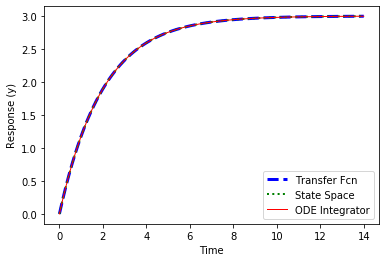

In [9]:
plt.figure(1)
plt.plot(t1,y1,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2,'g:',linewidth=2,label='State Space')
plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.show()